In [ ]:
# Code for the Book: International Stock Picking A.I. INVESTOR: A Guide to Build.
# Website: ai-investor.net
# Code needs am "All-In-One" subscription from the (presumably) nice people at https://eodhistoricaldata.com/. 
# Check the book text to see if they have changed their service since mid-2021.

# Damon Lee 2021

# Feel free to fork this code for others to see what can be done with it.

In [8]:
import pandas as pd
import numpy as np

In [9]:
# Set the plotting DPI settings to be a bit higher.
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [7.0, 4.5]
plt.rcParams['figure.dpi'] = 150

<AxesSubplot:xlabel='Date'>

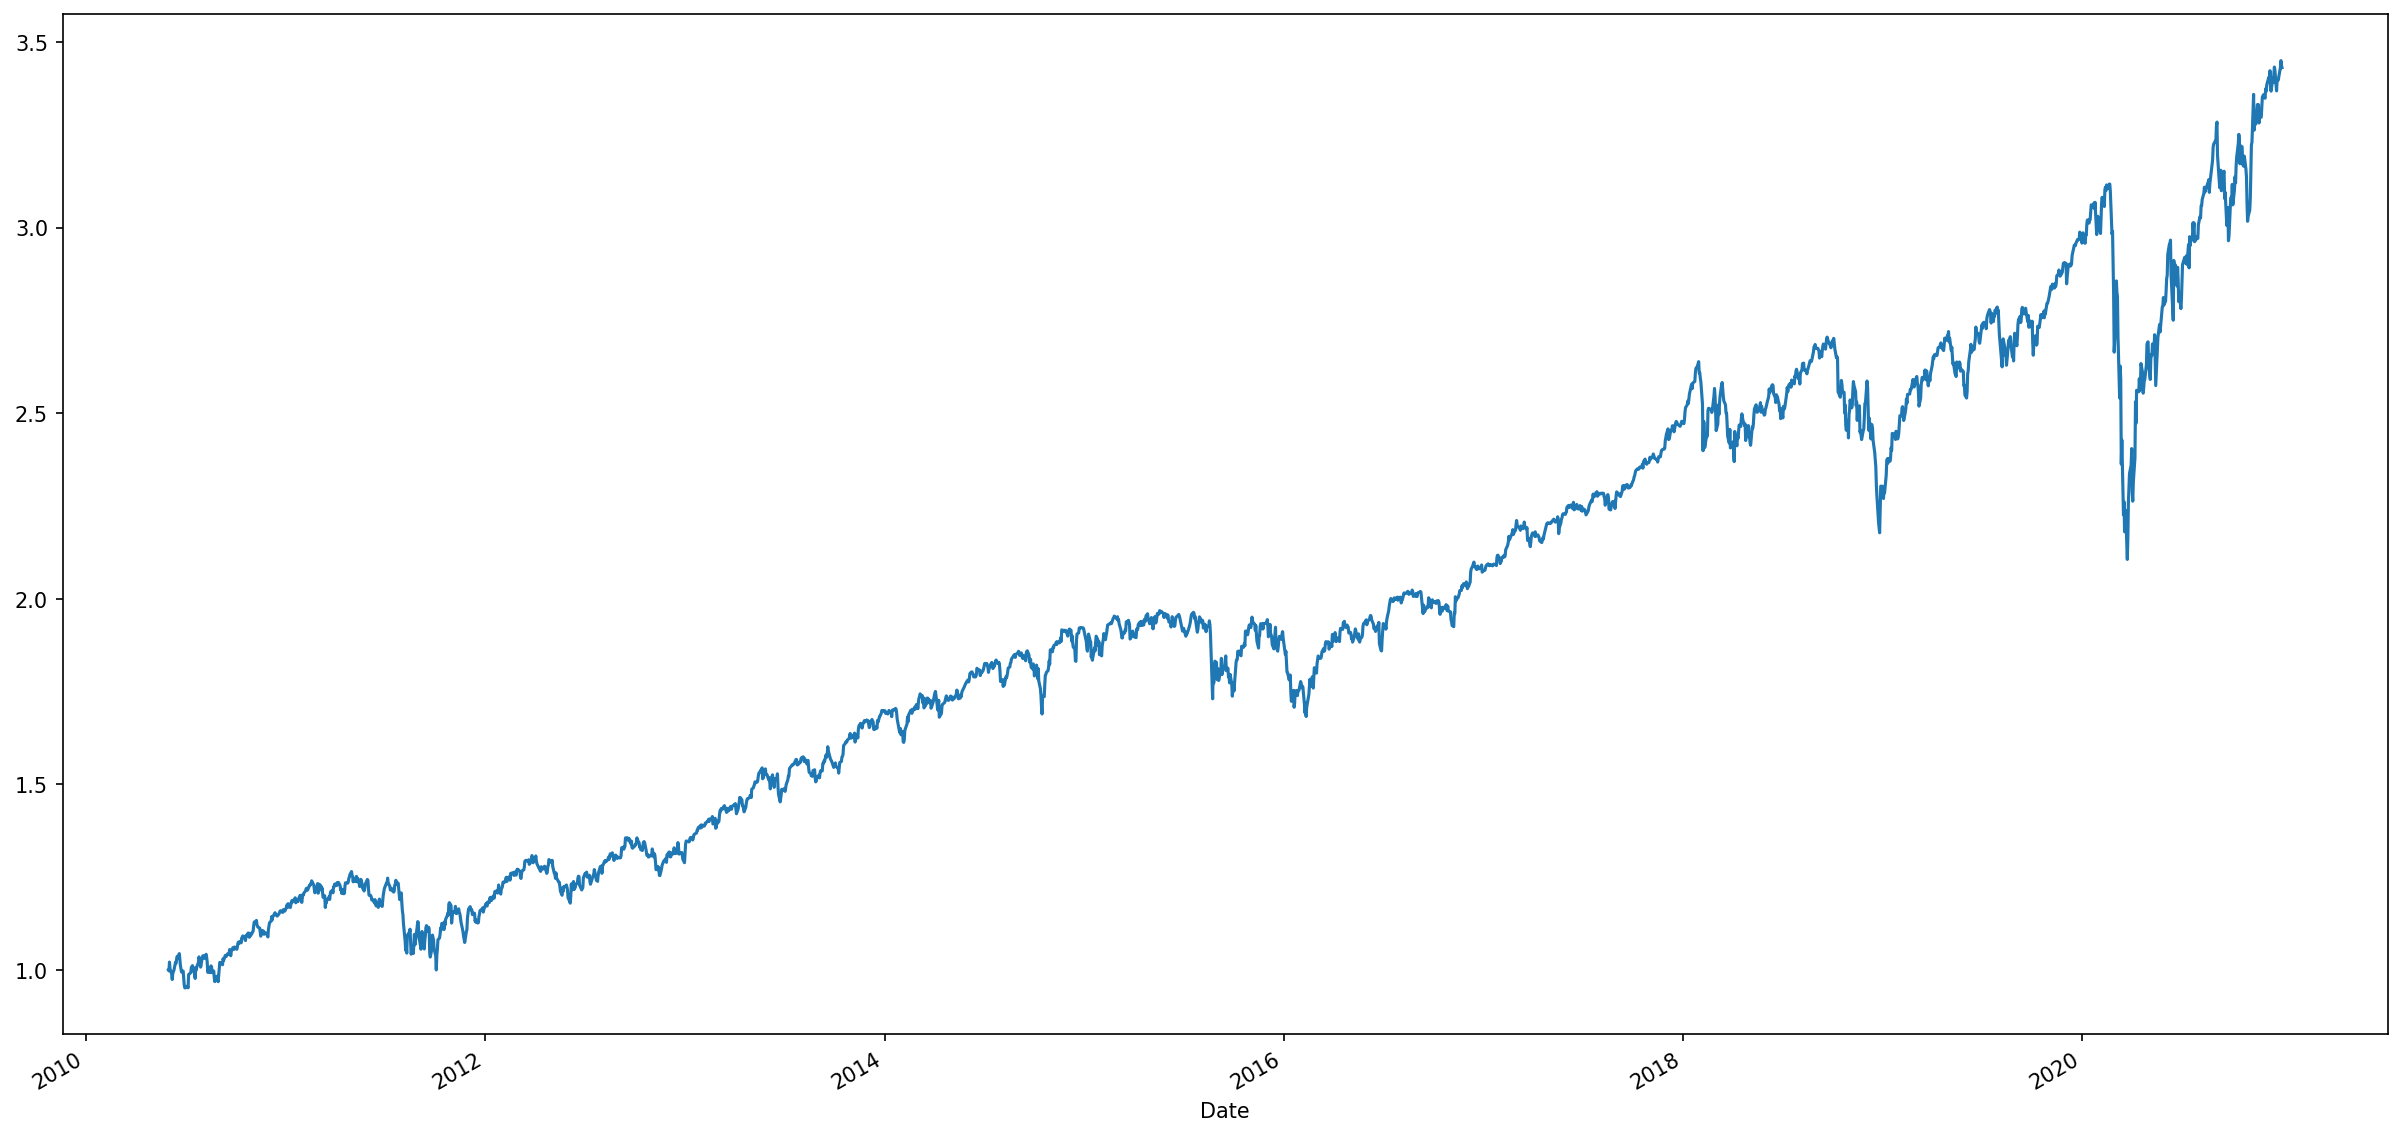

In [10]:
import pandas_datareader.data as pdr
def dataForTicker(ticker, start, end):
    tickerData = pdr.DataReader(ticker, "yahoo", start, end);
    return tickerData

spy = dataForTicker('spy', '2010-06-01', '2021-01-01')
#spy = getPortfolioRelativeTimeSeries(spy)
plt.figure(figsize=(20,10))
spy = spy['Open']
spy = spy/spy.iloc[0]
spy.plot()
#bb['6'].plot()

Text(0.5, 1.0, 'Annual USA Backtests with GradBoost\n Simple Modern Portfolio Theory Implementation')

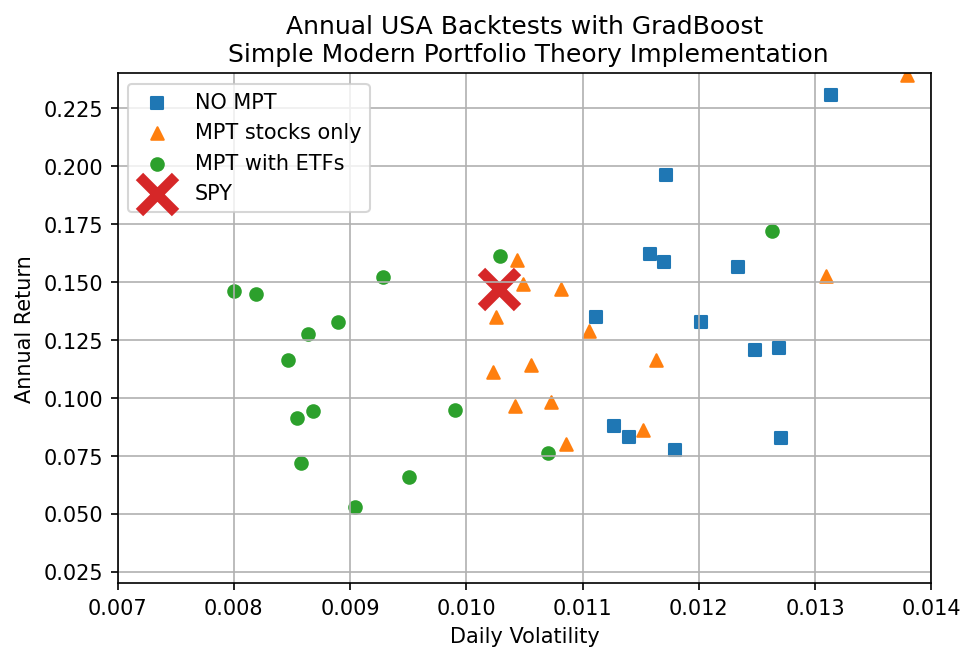

In [52]:
# With 10 stocks, run Annualy, NO MPT. start/end mid year.
a = pd.read_csv('MPTBenchmarkRuns_NoMPT_NoETFs.csv', index_col=0, parse_dates=True).iloc[:,:15]

# With 16 stocks, run Annualy, MPT. start/end mid year.
b = pd.read_csv('MPTBenchmarkRuns_MPT_NoETFs.csv', index_col=0, parse_dates=True).iloc[:,:15]

# With 16 stocks, run Annualy, MPT. start/end mid year. WITH GOLD & BONDS ETF Exposure.
c = pd.read_csv('MPTBenchmarkRuns_MPT_ETFs.csv', index_col=0, parse_dates=True).iloc[:,:15]

plt.scatter(np.std(np.log(a / a.shift(-1))), pow(a.iloc[-1], 1/9)-1, marker='s')
plt.scatter(np.std(np.log(b / b.shift(-1))), pow(b.iloc[-1], 1/9)-1, marker='^')
plt.scatter(np.std(np.log(c / c.shift(-1))), pow(c.iloc[-1], 1/9)-1, marker='o')
plt.scatter(np.std(np.log(spy / spy.shift(-1))), pow(spy.iloc[-1], 1/9)-1, marker='x', s=300, linewidths=5)
plt.legend(['NO MPT','MPT stocks only','MPT with ETFs','SPY'])
plt.ylabel('Annual Return');
plt.xlabel('Daily Volatility');
plt.grid()
plt.xlim([0.007, 0.014])
plt.ylim([0.02, 0.24])
plt.title('Annual USA Backtests with GradBoost\n Simple Modern Portfolio Theory Implementation')

In [47]:
a.iloc[-1].mean()

3.5166695146145694

In [48]:
b.iloc[-1].mean()

3.362263568885692

In [49]:
c.iloc[-1].mean()

2.731061255377662